### 实验介绍
电子邮件是互联网的一项重要服务，在大家的学习、工作和生活中会广泛使用。但是大家的邮箱常常被各种各样的垃圾邮件填充了。有统计显示，每天互联网上产生的垃圾邮件有几百亿近千亿的量级。因此，对电子邮件服务提供商来说，垃圾邮件过滤是一项重要功能。而朴素贝叶斯算法在垃圾邮件识别任务上一直表现非常好，至今仍然有很多系统在使用朴素贝叶斯算法作为基本的垃圾邮件识别算法。

本次数据集来自[Trec06](https://plg.uwaterloo.ca/cgi-bin/cgiwrap/gvcormac/foo06)的中文垃圾邮件数据集，目录解压后包含三个文件夹，其中data目录下是所有的邮件（未分词），已分词好的邮件在data_cut目录下。邮件分为邮件头部分和正文部分，两部分之间一般有空行隔开。标签数据在label文件夹下，文件中每行是标签和对应的邮件路径。‘spam’表示垃圾邮件，‘ham’表示正常邮件。

### 导入工具包

In [1]:
'''
提示：
若调用已有工具包，sklearn中提供了一些可能会用到的类。
'''
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # 提取文本特征向量的类
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB # 三种朴素贝叶斯算法，差别在于估计p(x|y)的方式
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support

In [2]:
df = pd.read_table('./trec06c-utf8/label/index', sep=' ', header=None, names=['target','path'])
df['path'] = df['path'].str.replace('./data','/trec06c-utf8/data_cut')
emails = []

for i,j in df.iterrows():
    with open(j['path'], encoding='utf-8') as f:
        email = f.read()
        emails.append(''.join(email.split("\n\n",1)[1:]))

#### 使用CoutVectorizer

In [3]:
#emails = np.array(emails)
x_train, x_test, train_y, test_y = train_test_split(emails, df['target'].values, test_size=0.3, random_state=8)
type(x_train), type(x_test), type(train_y), type(test_y)

(list, list, numpy.ndarray, numpy.ndarray)

In [4]:
vectorizer = CountVectorizer()
train_x = vectorizer.fit_transform(x_train)
test_x = vectorizer.transform(x_test)
train_x.shape, test_x.shape

((45234, 174116), (19386, 174116))

#### 使用BernoulliNB

In [5]:
BNB = BernoulliNB()
BNB.fit(train_x,train_y)
predict_y = BNB.predict(test_x)
test_acc = accuracy_score(predict_y, test_y)
print("Accuracy by BernoulliNB is : %.6f" %(test_acc))
print(confusion_matrix(y_true=test_y, y_pred=predict_y))
print(classification_report(y_true=test_y, y_pred=predict_y))

Accuracy by BernoulliNB is : 0.941968
[[ 6362   209]
 [  916 11899]]
              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      6571
        spam       0.98      0.93      0.95     12815

    accuracy                           0.94     19386
   macro avg       0.93      0.95      0.94     19386
weighted avg       0.95      0.94      0.94     19386



使用BernoulliNB的准确率为0.94

#### 使用MultinomialNB

In [6]:
MNB = MultinomialNB()
MNB.fit(train_x,train_y)
predict_y = MNB.predict(test_x)
test_acc = accuracy_score(predict_y, test_y)
print("Accuracy by MultinomialNB is : %.6f" %(test_acc))
print(confusion_matrix(y_true=test_y, y_pred=predict_y))
print(classification_report(y_true=test_y, y_pred=predict_y))

Accuracy by MultinomialNB is : 0.976323
[[ 6329   242]
 [  217 12598]]
              precision    recall  f1-score   support

         ham       0.97      0.96      0.97      6571
        spam       0.98      0.98      0.98     12815

    accuracy                           0.98     19386
   macro avg       0.97      0.97      0.97     19386
weighted avg       0.98      0.98      0.98     19386



使用BernoulliNB的准确率为0.976

#### 使用ComplementNB

In [7]:
CNB = ComplementNB()
CNB.fit(train_x,train_y)
predict_y = CNB.predict(test_x)
test_acc = accuracy_score(predict_y, test_y)
print("Accuracy by ComplementNB is : %.6f" %(test_acc))
print(confusion_matrix(y_true=test_y, y_pred=predict_y))
print(classification_report(y_true=test_y, y_pred=predict_y))

Accuracy by ComplementNB is : 0.970701
[[ 6336   235]
 [  333 12482]]
              precision    recall  f1-score   support

         ham       0.95      0.96      0.96      6571
        spam       0.98      0.97      0.98     12815

    accuracy                           0.97     19386
   macro avg       0.97      0.97      0.97     19386
weighted avg       0.97      0.97      0.97     19386



使用BernoulliNB的准确率为0.971

MulatinomialNB 的效果最好。

#### 使用TFIDF 逆向文档率

In [8]:
tfidf_vectorizer = TfidfVectorizer()
train_x = tfidf_vectorizer.fit_transform(x_train)
test_x = tfidf_vectorizer.transform(x_test)
print(train_x.shape, test_x.shape)

(45234, 174116) (19386, 174116)


#### 使用BernoulliNB

In [9]:
BNB = BernoulliNB()
BNB.fit(train_x,train_y)
predict_y = BNB.predict(test_x)
test_acc = accuracy_score(predict_y, test_y)
print("Accuracy by BernoulliNB in TFIDF is : %.6f" %(test_acc))
print(confusion_matrix(y_true=test_y, y_pred=predict_y))
print(classification_report(y_true=test_y, y_pred=predict_y))

Accuracy by BernoulliNB in TFIDF is : 0.941968
[[ 6362   209]
 [  916 11899]]
              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      6571
        spam       0.98      0.93      0.95     12815

    accuracy                           0.94     19386
   macro avg       0.93      0.95      0.94     19386
weighted avg       0.95      0.94      0.94     19386



#### 使用MultinomialNB

In [10]:
MNB = MultinomialNB()
MNB.fit(train_x,train_y)
predict_y = MNB.predict(test_x)
test_acc = accuracy_score(test_y, predict_y)
print("Accuracy by MultinomialNB in TFIDF is : %.6f" %(test_acc))
print(confusion_matrix(y_true=test_y, y_pred=predict_y))
print(classification_report(y_true=test_y, y_pred=predict_y))

Accuracy by MultinomialNB in TFIDF is : 0.976736
[[ 6242   329]
 [  122 12693]]
              precision    recall  f1-score   support

         ham       0.98      0.95      0.97      6571
        spam       0.97      0.99      0.98     12815

    accuracy                           0.98     19386
   macro avg       0.98      0.97      0.97     19386
weighted avg       0.98      0.98      0.98     19386



#### 使用使用ComplementNB

In [11]:
CNB = ComplementNB()
CNB.fit(train_x,train_y)
predict_y = CNB.predict(test_x)
test_acc = accuracy_score(test_y, predict_y)
print("Accuracy by ComplementNB in TFIDF is : %.6f" %(test_acc))
print(confusion_matrix(y_true=test_y, y_pred=predict_y))
print(classification_report(y_true=test_y, y_pred=predict_y))

Accuracy by ComplementNB in TFIDF is : 0.971784
[[ 6305   266]
 [  281 12534]]
              precision    recall  f1-score   support

         ham       0.96      0.96      0.96      6571
        spam       0.98      0.98      0.98     12815

    accuracy                           0.97     19386
   macro avg       0.97      0.97      0.97     19386
weighted avg       0.97      0.97      0.97     19386



In [12]:
df['target'].value_counts()

spam    42854
ham     21766
Name: target, dtype: int64

如上显示，由于垃圾邮件的正负例的比例不平衡，只看accuracy并不客观（会被大比例的target影响）。  
由于对非垃圾邮件的误判有比较严格的要求，对recall的指标要重点看下（即正确预测的数量/实际预测的数量）。  
ham的recall的指标越高，说明非垃圾邮件预测正确的占实际非垃圾邮件的比例高。  
spam的recall的指标越高，说明垃圾邮件预测正确的占实际垃圾邮件的比例高。  
spam的precision的指标高，说明所有预测spam的数据中真实spam的比例高。那么预测spam的分母相对较小，该值才会高，也就说明模型更倾向于判断为ham。  
人类不太能接受ham判断为spam的情况，反而更能容忍spam判断为ham的情况。  
综上所述，ham recall和spam precision的指标高，而spam recall的指标在可接受的范围，是我们希望的情况。  
对比上面3个模型，BernoulliNB的，ham percision不到0.9，太低。  
所以ComplementNB可能更符合我们的要求。  

下面根据ComplementNB模型来观察max_features

### 观察下控制max_features对结果的影响
还是使用tfidf,使用ComplementNB，观察最大feature数,从5000~190000之间指标的变化。  
如下数据和图片显示，随着特征数的增大，ham recall在feature numbers = 25000 左右到达最大，为0.976，之后慢慢下降.而此时的spam recall在0.958,可以接受。  
与此同时，spam precision也为最大值，0.98。这说明模型偏向于判断为ham。
所以在tfidf下，使用ComplementNB的情况下，feature number选择25000为我们希望的情况。

In [13]:
spam_recall = []
ham_recall = []
spam_pre, ham_pre = [],[]
for i in range(5000,190001,5000):
    tfidf_vectorizer = TfidfVectorizer(max_features=i)
    train_x = tfidf_vectorizer.fit_transform(x_train)
    test_x = tfidf_vectorizer.transform(x_test)

    #train_x, test_x, train_y, test_y = train_test_split(X, df['target'].values, test_size=0.2, random_state=8)
    CNB = ComplementNB()
    CNB.fit(train_x,train_y)
    predict_y = CNB.predict(test_x)
    test_acc = accuracy_score(test_y, predict_y)
    print('-'*20 ,i, '-'*20)
    print("Accuracy by ComplementNB in TFIDF is : %.6f" %(test_acc))
    print(confusion_matrix(y_true=test_y, y_pred=predict_y))
    pre, rec, f1, sup = precision_recall_fscore_support(test_y, predict_y)
    print('ham recall:    %.3f | spam recall:    %.3f' %(rec[0],rec[1]))
    print('ham precision: %.3f | spam precision: %.3f' %(pre[0],pre[1]))
    ham_recall.append(rec[0])
    spam_recall.append(rec[1])
    ham_pre.append(pre[0])
    spam_pre.append(pre[1])
    #print(classification_report(y_true=test_y, y_pred=predict_y))

-------------------- 5000 --------------------
Accuracy by ComplementNB in TFIDF is : 0.956360
[[ 6368   203]
 [  643 12172]]
ham recall:    0.969 | spam recall:    0.950
ham precision: 0.908 | spam precision: 0.984
-------------------- 10000 --------------------
Accuracy by ComplementNB in TFIDF is : 0.959971
[[ 6393   178]
 [  598 12217]]
ham recall:    0.973 | spam recall:    0.953
ham precision: 0.914 | spam precision: 0.986
-------------------- 15000 --------------------
Accuracy by ComplementNB in TFIDF is : 0.961312
[[ 6401   170]
 [  580 12235]]
ham recall:    0.974 | spam recall:    0.955
ham precision: 0.917 | spam precision: 0.986
-------------------- 20000 --------------------
Accuracy by ComplementNB in TFIDF is : 0.962963
[[ 6409   162]
 [  556 12259]]
ham recall:    0.975 | spam recall:    0.957
ham precision: 0.920 | spam precision: 0.987
-------------------- 25000 --------------------
Accuracy by ComplementNB in TFIDF is : 0.963530
[[ 6411   160]
 [  547 12268]]
ham re

[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000]


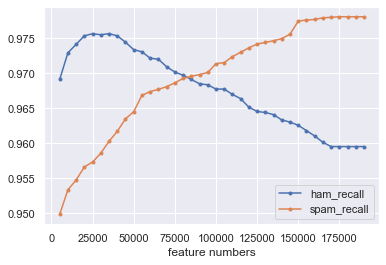

[0.9691066808704916, 0.9729112768224014, 0.9741287475270126, 0.9753462182316238, 0.9756505859077766, 0.9754984020697002, 0.9756505859077766, 0.9753462182316238, 0.9744331152031654, 0.9733678283366306, 0.9730634606604779, 0.9721503576320195, 0.971998173793943, 0.9709328869274083, 0.9701719677370263, 0.9697154162227971, 0.9691066808704916, 0.968497945518186, 0.9683457616801096, 0.967737026327804, 0.967737026327804, 0.966976107137422, 0.9663673717851164, 0.9651499010805052, 0.9645411657281997, 0.9643889818901232, 0.9640846142139705, 0.9633236950235885, 0.9630193273474357, 0.9625627758332065, 0.9618018566428246, 0.9610409374524426, 0.9601278344239842, 0.9595190990716785, 0.9595190990716785, 0.9595190990716785, 0.9595190990716785, 0.9595190990716785]


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
x = np.arange(5000,190001,5000)
print(x)
plt.plot(x, ham_recall,'.-', label='ham_recall')
plt.plot(x, spam_recall, '.-', label='spam_recall')
#plt.xticks(x)
plt.xlabel('feature numbers')
plt.legend()
plt.show()
print(ham_recall)

[ 20000  30000  40000  50000  60000  70000  80000  90000 100000 110000
 120000 130000 140000 150000 160000 170000 180000 190000]


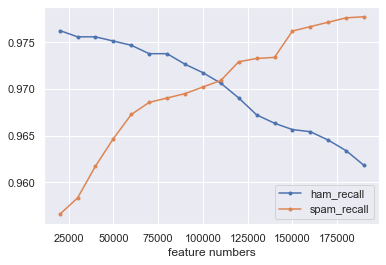

[0.9762819064829455, 0.9756042466681726, 0.9756042466681726, 0.9751524734583239, 0.9747007002484752, 0.973797153828778, 0.973797153828778, 0.9726677208041563, 0.9717641743844591, 0.9706347413598374, 0.9690535351253671, 0.9672464422859725, 0.9663428958662751, 0.9656652360515021, 0.9654393494465778, 0.9645358030268805, 0.9634063700022588, 0.9618251637677886]


In [22]:
'''
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
x = np.arange(20000,190001,5000)
print(x)
plt.plot(x, ham_recall,'.-', label='ham_recall')
plt.plot(x, spam_recall, '.-', label='spam_recall')
#plt.xticks(x)
plt.xlabel('feature numbers')
plt.legend()
plt.show()
print(ham_recall)
'''

下面我们尝试调整n-gram。
### 尝试控制n元语法，来分析最后的指标
当ngram=(1,2)时，在不指定max_features时，总共有1887779个维度。  
先比较与ngram=(1,1)时，max_features需要调大才会有比较好的效果。  
根据调试，  
当max_features=100000时，spam precision=100%，即在所有预测为spam的数量里，几乎所有的预测都正确，而ham percision=92%，并不高。  
说明模型偏向于将邮件判断为ham，因为总体预测为ham数量增加了，ham percision才有可能不高。而spam precision很高说明总体预测为spam很保守！  
该参数值为我们希望的值。

In [16]:
tfidf_vectorizer = TfidfVectorizer(max_features=100000, ngram_range=(1,2))
train_x = tfidf_vectorizer.fit_transform(x_train)
test_x = tfidf_vectorizer.transform(x_test)
#train_x, test_x, train_y, test_y = train_test_split(X, df['target'].values, test_size=0.2, random_state=8)
print(train_x.shape) #test_x.shape train_y.shape test_y.shape
CNB = ComplementNB()
CNB.fit(train_x,train_y)
predict_y = CNB.predict(test_x)
test_acc = accuracy_score(test_y, predict_y)
print("Accuracy by ComplementNB in TFIDF is : %.6f" %(test_acc))
print(confusion_matrix(y_true=test_y, y_pred=predict_y))
print(classification_report(y_true=test_y, y_pred=predict_y))

(45234, 100000)
Accuracy by ComplementNB in TFIDF is : 0.968018
[[ 6510    61]
 [  559 12256]]
              precision    recall  f1-score   support

         ham       0.92      0.99      0.95      6571
        spam       1.00      0.96      0.98     12815

    accuracy                           0.97     19386
   macro avg       0.96      0.97      0.96     19386
weighted avg       0.97      0.97      0.97     19386



In [17]:
tfidf_vectorizer = TfidfVectorizer( ngram_range=(1,2))
X = tfidf_vectorizer.fit_transform(x_train)
X.shape

(45234, 1772122)

### 尝试 SVM

使用TFIDF后的词向量，先是线性模型。

In [18]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 0.8, random_state = 8)
svm.fit(train_x, train_y)
p_y = svm.predict(test_x)

In [19]:
test_acc = accuracy_score(test_y, p_y)
print("Accuracy by linear SVM in TFIDF is : %.6f" %(test_acc))
print(classification_report(y_true=test_y, y_pred=p_y))

Accuracy by linear SVM in TFIDF is : 0.995254
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      6571
        spam       1.00      1.00      1.00     12815

    accuracy                           1.00     19386
   macro avg       1.00      0.99      0.99     19386
weighted avg       1.00      1.00      1.00     19386



SVM的线性模型在垃圾邮件处理的表现很优秀。

再尝试使用非线性模型。
kernel = rbf

In [20]:
svm_rbf = SVC(kernel = 'rbf', C = 0.8, random_state = 8, gamma = 'auto')
svm_rbf.fit(train_x, train_y)
p_y_rbf = svm_rbf.predict(test_x)

In [21]:
test_acc = accuracy_score(test_y, p_y_rbf)
print("Accuracy by linear SVM of rbf in TFIDF is : %.6f" %(test_acc))
print(classification_report(y_true=test_y, y_pred=p_y_rbf))

Accuracy by linear SVM of rbf in TFIDF is : 0.661044


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         ham       0.00      0.00      0.00      6571
        spam       0.66      1.00      0.80     12815

    accuracy                           0.66     19386
   macro avg       0.33      0.50      0.40     19386
weighted avg       0.44      0.66      0.53     19386



kernel = poly

In [23]:
svm_poly = SVC(kernel = 'poly', C = 0.8, random_state = 8)
svm_poly.fit(train_x, train_y)
p_y_poly = svm_poly.predict(test_x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
test_acc = accuracy_score(test_y, p_y_poly)
print("Accuracy by linear SVM of poly in TFIDF is : %.6f" %(test_acc))
print(classification_report(y_true=test_y, y_pred=p_y_poly))

Accuracy by linear SVM of poly in TFIDF is : 0.661044


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         ham       0.00      0.00      0.00      6571
        spam       0.66      1.00      0.80     12815

    accuracy                           0.66     19386
   macro avg       0.33      0.50      0.40     19386
weighted avg       0.44      0.66      0.53     19386



kernel = sigmod

In [27]:
svm_sigmoid = SVC(kernel = 'sigmoid', C = 0.8, random_state = 8)
svm_sigmoid.fit(train_x, train_y)
p_y_sigmoid = svm_sigmoid.predict(test_x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [28]:
test_acc = accuracy_score(test_y, p_y_poly)
print("Accuracy by linear SVM of poly in TFIDF is : %.6f" %(test_acc))
print(classification_report(y_true=test_y, y_pred=p_y_poly))

Accuracy by linear SVM of poly in TFIDF is : 0.661044


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         ham       0.00      0.00      0.00      6571
        spam       0.66      1.00      0.80     12815

    accuracy                           0.66     19386
   macro avg       0.33      0.50      0.40     19386
weighted avg       0.44      0.66      0.53     19386

